# Analysis for pca individual approach

In [1]:
from joblib import load
import pandas as pd
import numpy as np
import os
import re

import matplotlib.pyplot as plt

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]

dir_results = '/home/pedrosergiot/Documents/Attention_Classification_PCA/pca_individual_results/'
filenames = os.listdir(dir_results)
filenames.sort(key=natural_keys)
print(filenames)

['ResultsGrid_1_Windows', 'ResultsGrid_2_Windows', 'ResultsGrid_3_Windows', 'ResultsGrid_4_Windows', 'ResultsGrid_5_Windows', 'ResultsGrid_6_Windows', 'ResultsGrid_7_Windows', 'ResultsGrid_8_Windows', 'ResultsGrid_9_Windows', 'ResultsGrid_10_Windows', 'ResultsGrid_11_Windows', 'ResultsGrid_12_Windows', 'ResultsGrid_13_Windows', 'ResultsGrid_14_Windows', 'ResultsGrid_15_Windows', 'ResultsGrid_16_Windows', 'ResultsGrid_17_Windows', 'ResultsGrid_18_Windows', 'ResultsGrid_19_Windows', 'ResultsGrid_20_Windows', 'ResultsGrid_21_Windows']


In [3]:
results_df = load(dir_results + 'ResultsGrid_1_Windows')
    
test = pd.DataFrame(results_df[1])

gf = test.groupby(['neurons1','neurons2'])

gf.head()

,neurons1,neurons2,acc
0,1,0,0.655172
1,1,0,0.586207
2,1,0,0.517241
3,1,0,0.620690
4,1,0,0.517241
10,1,1,0.517241
11,1,1,0.586207
12,1,1,0.517241
13,1,1,0.517241
14,1,1,0.517241


In [4]:
best_results1 = []

for name in filenames:
    results_nwin = load(dir_results + name)
    
    max_mean1 = 0
    
    for npcs in results_nwin.keys():
        data_npcs = pd.DataFrame(results_nwin[npcs])
    
        gf = data_npcs.groupby(['neurons1','neurons2'])
        
        for key in gf.groups.keys():
            if gf.get_group(key)['acc'].mean() > max_mean1:
                max_mean1 = gf.get_group(key)['acc'].mean()
                max_std1 = gf.get_group(key)['acc'].std()
                max_npcs = npcs
                max_key1 = key
            
    best_results1.append((max_mean1, max_std1, max_npcs, max_key1))
best_results1 = np.array(best_results1)

In [5]:
best_results1

array([[0.6145320057868957, 0.07927820600783726, 16, (10, 5)],
       [0.6282019674777984, 0.06083420458301936, 4, (3, 0)],
       [0.6315270841121674, 0.07558228085163624, 11, (9, 0)],
       [0.6178571343421936, 0.0943778970731362, 12, (10, 9)],
       [0.6144088625907898, 0.08743447154102042, 13, (9, 7)],
       [0.610960590839386, 0.07305780633694627, 14, (8, 0)],
       [0.6246305286884308, 0.08608913358359929, 17, (3, 0)],
       [0.6144088566303253, 0.10199220778803907, 13, (2, 0)],
       [0.6252462923526764, 0.087580059718734, 18, (6, 0)],
       [0.6043103337287903, 0.10600683401127962, 11, (10, 10)],
       [0.5938423573970795, 0.07609557436563318, 12, (5, 0)],
       [0.6077586233615875, 0.055663717514173656, 12, (5, 0)],
       [0.6149014711380005, 0.10066104481900298, 13, (9, 0)],
       [0.6248768448829651, 0.09852251132938211, 13, (10, 0)],
       [0.6288177311420441, 0.10621353531540527, 12, (3, 0)],
       [0.6252462983131408, 0.11132297623025011, 12, (9, 0)],
       

In [6]:
a = best_results1[:,3]
num_neurons1 = [neurons[0] for neurons in a]

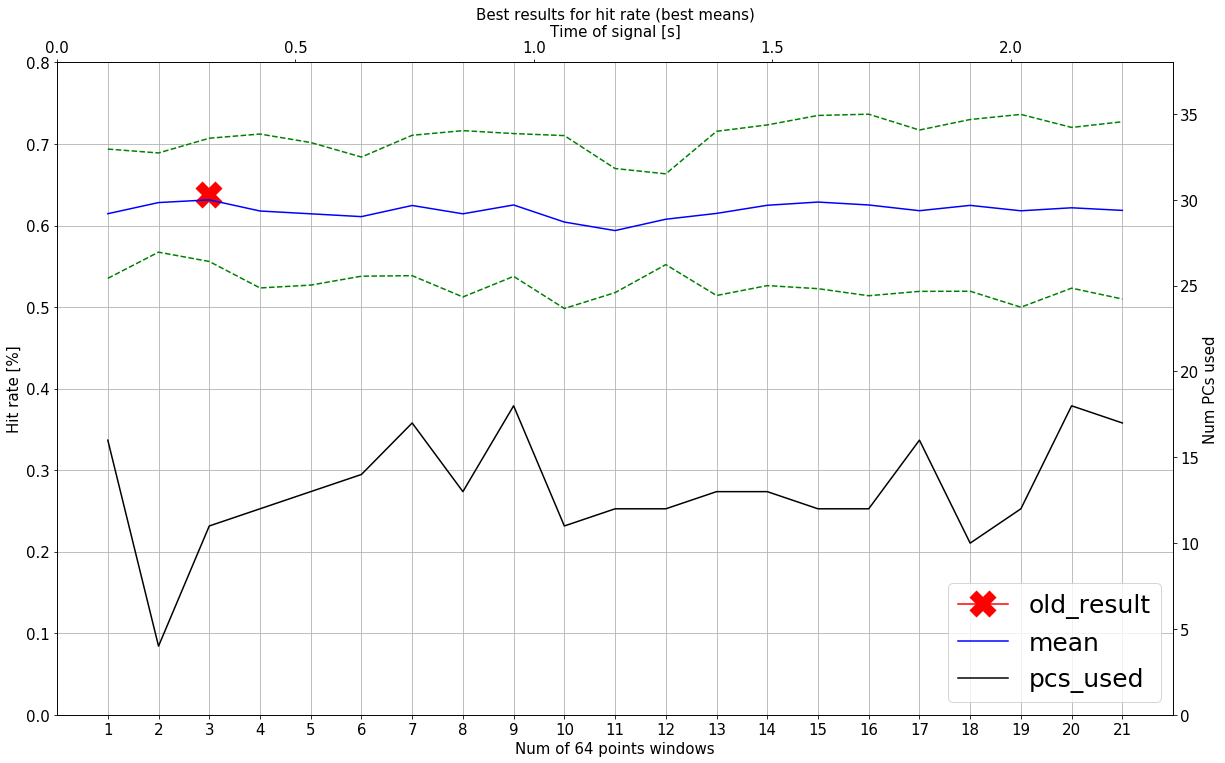

In [7]:
fig,ax = plt.subplots(figsize=(20,12))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('Num of 64 points windows', fontsize=15)
ax.set_ylabel('Hit rate [%]', fontsize=15)
ax.set_title('Best results for hit rate (best means)', fontsize=15)
plt.xticks(np.arange(len(best_results1)), np.arange(1, len(best_results1)+1))
plt.axis([-1,len(best_results1),0,0.8])
plt.grid(True)

plt0 = ax.plot([2], [0.6372], markersize=20, markeredgewidth = 10, marker='x', color='red', label='old_result')
plt1 = ax.plot(best_results1[:,0], color='blue', label='mean');
ax.plot(best_results1[:,0] - best_results1[:,1], color='green', linestyle='--', label='std_low');
ax.plot(best_results1[:,0] + best_results1[:,1], color='green', linestyle='--', label='std_high');

ax2 = ax.twinx();  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Num PCs used', fontsize=15);  # we already handled the x-label with ax1
plt2 = ax2.plot(best_results1[:,2], color='black', label='pcs_used');
ax2.set_ylim(bottom=0, top=38);
ax2.yaxis.set_tick_params(labelsize=15)

lns = plt0+plt1+plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4, fontsize=25);

def nwin_time(x):
    return (x+1)*64/601.5

def time_nwin(x):
    return x*601.5/64

secax = ax.secondary_xaxis('top', functions=(nwin_time, time_nwin))
secax.set_xlabel('Time of signal [s]', fontsize=15)
secax.xaxis.set_tick_params(labelsize=15)

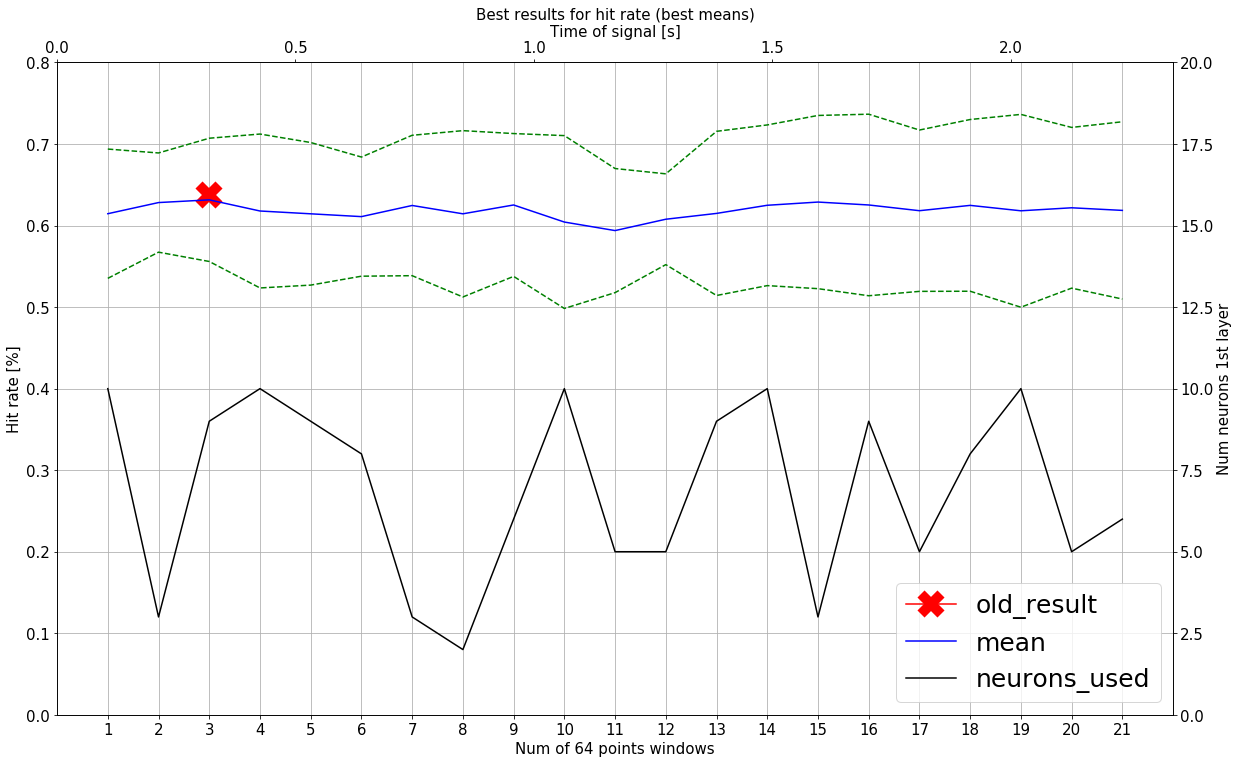

In [8]:
fig,ax = plt.subplots(figsize=(20,12))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('Num of 64 points windows', fontsize=15)
ax.set_ylabel('Hit rate [%]', fontsize=15)
ax.set_title('Best results for hit rate (best means)', fontsize=15)
plt.xticks(np.arange(len(best_results1)), np.arange(1, len(best_results1)+1))
plt.axis([-1,len(best_results1),0,0.8])
plt.grid(True)

plt0 = ax.plot([2], [0.6372], markersize=20, markeredgewidth = 10, marker='x', color='red', label='old_result')
plt1 = ax.plot(best_results1[:,0], color='blue', label='mean');
ax.plot(best_results1[:,0] - best_results1[:,1], color='green', linestyle='--', label='std_low');
ax.plot(best_results1[:,0] + best_results1[:,1], color='green', linestyle='--', label='std_high');

ax2 = ax.twinx();  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Num neurons 1st layer', fontsize=15);  # we already handled the x-label with ax1
plt2 = ax2.plot(num_neurons1, color='black', label='neurons_used');
ax2.set_ylim(bottom=0, top=20);
ax2.yaxis.set_tick_params(labelsize=15)

lns = plt0+plt1+plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4, fontsize=25);

def nwin_time(x):
    return (x+1)*64/601.5

def time_nwin(x):
    return x*601.5/64

secax = ax.secondary_xaxis('top', functions=(nwin_time, time_nwin))
secax.set_xlabel('Time of signal [s]', fontsize=15)
secax.xaxis.set_tick_params(labelsize=15)